# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
! git clone https://github.com/SafaaMahbub/scratchpad
%run ./scratchpad/get_data.py

Cloning into 'scratchpad'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 27 (delta 6), reused 4 (delta 4), pack-reused 17 (from 1)
Receiving objects: 100% (27/27), 47.00 KiB | 1.88 MiB/s, done.
Resolving deltas: 100% (7/7), done.
Download complete
Extracting data files...
Data extracted


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/data/airbnb_NYC.csv',encoding='latin1')

df.tail(200)
df['Price'] = df['Price'].str.replace(',','')

df['Price'] = pd.to_numeric( df['Price'], errors = 'coerce' )

df.tail(200)

count = df['Price'].isna().sum()
print(count)



0


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/data/mn_police_use_of_force.csv',encoding='latin1')
df.head()

print(df['subject_injury'].value_counts(dropna=False))
df['subject_injury'] = df['subject_injury'].fillna('Missing')
print(df['subject_injury'].value_counts(dropna=False))
print('proportion of missing: ',(df['subject_injury']=='Missing').mean())



pd.crosstab(df['subject_injury'], df['force_type'])


subject_injury
NaN    9848
Yes    1631
No     1446
Name: count, dtype: int64
subject_injury
Missing    9848
Yes        1631
No         1446
Name: count, dtype: int64
proportion of missing:  0.7619342359767892


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
Missing,2,7051,1421,0,27,74,87,0,170,31,985
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172


the amount of type "Missing" has been descreased after a crosstabulated  both of the variables

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/data/metabric.csv',encoding='latin1')

df['Overall Survival Status dummy'] = df['Overall Survival Status'].map({'0:LIVING':1,'1:DECEASED':0})
df['Overall Survival Status dummy'].value_counts(dropna=False)

,count
Overall Survival Status dummy,
0,768
1,575


Missing values: For airbnb_NYC.csv, determine how many missing values of Review Scores Rating there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/data/airbnb_NYC.csv',encoding='latin1')
print(df['Review Scores Rating'].value_counts(dropna=False))

df['new Review Scores Rating'] = df['Review Scores Rating'].fillna(df['Review Scores Rating'].median())
print(df['new Review Scores Rating'].value_counts(dropna=False))

Review Scores Rating
NaN      8323
100.0    5594
90.0     1729
93.0     1614
80.0     1423
95.0     1295
96.0     1188
97.0     1033
94.0      943
92.0      875
98.0      843
91.0      812
87.0      714
88.0      614
89.0      561
85.0      365
86.0      348
99.0      318
84.0      289
83.0      267
60.0      244
82.0      136
70.0      132
73.0       89
78.0       84
77.0       80
76.0       75
81.0       66
75.0       60
40.0       47
79.0       46
67.0       42
20.0       39
72.0       32
74.0       26
71.0       22
65.0       21
68.0       19
50.0       19
69.0       11
53.0        8
62.0        5
63.0        5
64.0        4
66.0        3
47.0        3
55.0        3
57.0        2
58.0        2
43.0        2
30.0        2
49.0        1
Name: count, dtype: int64
new Review Scores Rating
94.0     9266
100.0    5594
90.0     1729
93.0     1614
80.0     1423
95.0     1295
96.0     1188
97.0     1033
92.0      875
98.0      843
91.0      812
87.0      714
88.0      614
89.0      561
85.0

If the most ratings were NOT good the median would be low too. If we fill the missing scores with the median score that is low, it might pull down the overall average rating

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?
2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_excel('/content/GSAF5.xls')

print(df.columns)

empty_col = df.columns[df.isna().isnull().all()].tolist()
print(empty_col)
df = df.drop(empty_col, axis=1)

print(df.columns)
df.head()


df['Year'] = pd.to_numeric( df['Year'], errors = 'coerce' )
df.dtypes

df = df.loc[df['Year']>1940]
df['Year'].value_counts()

Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')
[]
Index(['Date', 'Year', 'Type', 'Country', 'State', 'Location', 'Activity',
       'Name', 'Sex', 'Age', 'Injury', 'Fatal Y/N', 'Time', 'Species ',
       'Source', 'pdf', 'href formula', 'href', 'Case Number', 'Case Number.1',
       'original order', 'Unnamed: 21', 'Unnamed: 22'],
      dtype='object')


,count
Year,
2015.0,143
2017.0,141
2016.0,134
2011.0,128
2014.0,126
2018.0,124
2008.0,122
2013.0,122
2009.0,120


the attacks are increased and there has been an incrase in the recent years.

<Axes: xlabel='Age', ylabel='Count'>

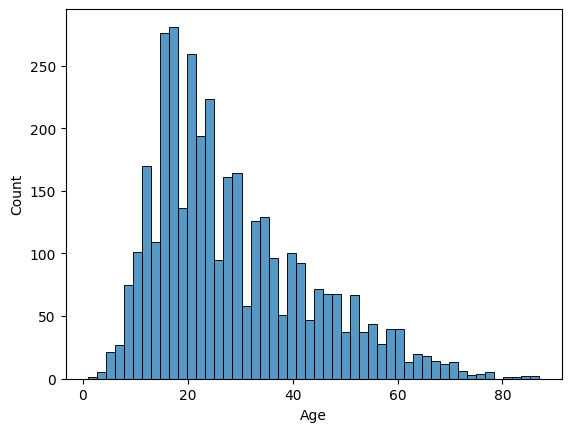

In [ ]:

pd.set_option('display.max_rows', None)
df['Age'].value_counts(dropna= False)
#filtered_df['Age'] = filtered_df['Age'].fillna('Missing')
df['Age'] = pd.to_numeric(df['Age'], errors = 'coerce')
df['Age'].value_counts(dropna= False)

#df['Age'] = df['Age'].fillna('Uknown')

df['Age'].value_counts(dropna= False)

sns.histplot(df['Age'], bins=50 )

In [ ]:
df['Type'].value_counts(dropna=False)


df['Type'].value_counts()
df['Type'] = df['Type'].map({'Provoked': 'Provoked', 'Unprovoked': 'Unprovoked','unprovoked':'Unprovoked'})
df['Type'].value_counts(dropna=False)
df['Type'] = df['Type'].fillna('Unknown')
df['Type'].value_counts(dropna=False)

unprovoked = (df['Type']=='Unprovoked').mean()
print(unprovoked)

0.745012694958288


In [ ]:
df['Fatal Y/N'].value_counts()
df['Fatal Y/N'] = df['Fatal Y/N'].map({'N': 'N', 'Y': 'Y','n':'N'})
df['Fatal Y/N'].value_counts(dropna=False)
df['Fatal Y/N'] = df['Fatal Y/N'].fillna('Unknown')
df['Fatal Y/N'].value_counts(dropna=False)

print(df.loc[df['Type']=='Unprovoked', 'Fatal Y/N'].value_counts())

print(df.loc[df['Type']=='Provoked', 'Fatal Y/N'].value_counts())

Fatal Y/N
N          3365
Y           685
Unknown      58
Name: count, dtype: int64
Fatal Y/N
N          497
Y           12
Unknown     11
Name: count, dtype: int64


If the attacks were unprovoked, it is more likely that the attack will end up being fatal

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?


This paper is about how to effectively tidy data so that it can be ready for analysis. According to the paper, tidy data sets are easy to work with. Not a lot of tools are needed to tidy a dataset.


  2. Read the introduction. What is the "tidy data standard" intended to accomplish?


  Answer: tidy data standard: structuring datasets to faciliate analysis.
  - Each column is a variable
  - Each row is an observation
  - Each type of observational unit is a table


  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."


Each person have similar attributes and each person is an observation in a dataset. A person would be one entry of the dataset. Each family has some sort of structure. In messy datasets, the set can be messy in many ways as it rows may be a variable or a dataset may have many columns that can be stacked into one. Its usually easy to figure out what an observation is as it is usually an independent object. However, defining what a variable is depends on the scenario and  which information of the observation is important. Variables and observation have universal meanings.


  4. Read Section 2.2. How does Wickham define values, variables, and observations?


Values: Values are usually number and string which belongs to a variable and an observation


Variables: contains all calues that measure the same attribute(common attrbiutes like height, age)


Observation: contains all values that are stroed within variables. It essentially is one entty of the dataset


  5. How is "Tidy Data" defined in section 2.3?
  it is defined as the standard way of mapping the meaning od a dataset to its structure. A dataset is considered as "tidy data" if each variable forms a column, each observation forms a row, and each type of observational unit forms a table

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  The 5 most common problems are:
  - Column headers are values, not variable names
  -Multiple variables are stored in one column
  - Variables are stored in both rows and columns
  - Multiple types of observational unites are stored in the same table
  - A single observational unit is stored in multiple tables


  Table 4 is considered messy as the column names are not variables and rather they are income brackets. Income, religion and frequency should have their own column

  In this context, "Melting" means to turn the rows into columns

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

  In table 11, some variables are spread across the column name and the teperature type is in rows instead of columns asltohugh that is a variable of the weather

  
  Table 12 is considered to be molten because many columns of the days were stacked into one column. This table is also considered tidy as each row shows an observation of the max or min teperature of a day.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

Citation: ChatGPT
Why: I used chat to help me with code.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('/content/data/ForeignGifts_edu.csv',encoding='latin1')
df['Foreign Gift Amount'] = pd.to_numeric(df['Foreign Gift Amount'], errors = 'coerce')

#sns.histplot( np.arcsinh(df['Foreign Gift Amount']), bins=50 )
df['Foreign Gift Amount'].value_counts(dropna=False)
#sns.histplot( np.arcsinh(df['Foreign Gift Amount']), bins=50)


print(df['Foreign Gift Amount'].head())
print(df['Foreign Gift Amount'].min())
print(df['Foreign Gift Amount'].max())

df_po = df[df['Foreign Gift Amount']>0]


0     250000
1     463657
2    3649107
3       1000
4      49476
Name: Foreign Gift Amount, dtype: int64
-537770
99999999


<Axes: xlabel='Foreign Gift Amount', ylabel='Count'>

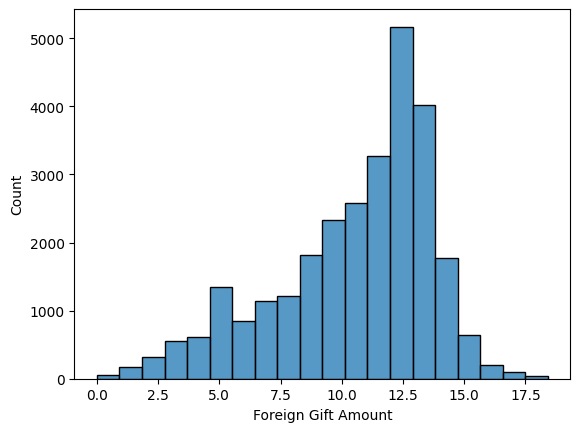

In [ ]:
sns.histplot( np.log(df_po['Foreign Gift Amount']), bins=20 )

In [ ]:
df_po['Foreign Gift Amount'].describe()

,Foreign Gift Amount
count,2.819700e+04
mean,5.887770e+05
std,3.223327e+06
min,1.000000e+00
25%,5.793000e+03
50%,9.509100e+04
75%,3.767520e+05
max,1.000000e+08


the gift amounts are highly sweked. There are gift amounts that are low as $25 and the highest sift amount was 100,000,000 dollars. Them dian gift amount was aroung 588777. Some values are very small and some gifts are very high in amount. I therefore used the log function to make a better graph for the histogram.

In [ ]:
df['Gift Type'].value_counts(dropna=False)


,count
Gift Type,
Contract,17274
Monetary Gift,10936
Real Estate,11


In [ ]:
print((df['Gift Type'] == 'Contract').mean())
print((df['Gift Type'] == 'Monetary Gift').mean())
print((df['Gift Type'] == 'Real Estate').mean())

0.6120973742957372
0.3875128450444704
0.00038978065979235324


In [ ]:
df.groupby('Country of Giftor')['Giftor Name'].count().sort_values(ascending=False).head(15)

,Giftor Name
Country of Giftor,
ENGLAND,3337
CANADA,2101
CHINA,2094
JAPAN,1626
SWITZERLAND,1530
SAUDI ARABIA,1514
FRANCE,1295
GERMANY,1295
HONG KONG,806


In [ ]:
df.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


In [ ]:
top_15_institution = df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


Text(0, 0.5, 'Number of Institutions')

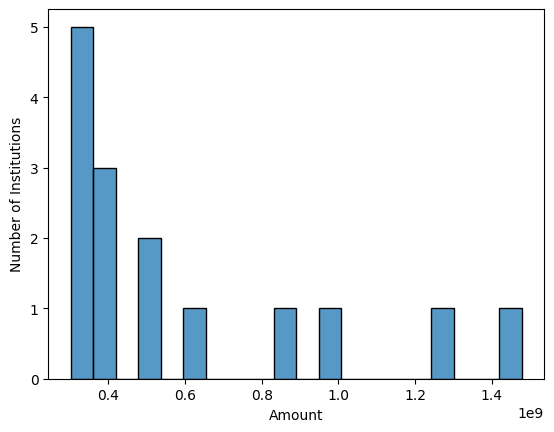

In [ ]:
top_15_institution = df.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
hist = sns.histplot(top_15_institution, bins=20)
hist.set_xlabel('Amount')
hist.set_ylabel('Number of Institutions')

In [ ]:
df.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


Qatar Foundation gives the highest amount in gifts. I beleive that Qatar and Saudia arabia are giving the highest amounts of gifts.

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

I used chatGPT used to code

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('/content/data/college_completion.csv',encoding='latin1')
df.info()
df.head()


pd.crosstab(df['control'], df['level']) # Notice the use of pd. and not df.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 63 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 3798 non-null   int64  
 1   unitid                                3798 non-null   int64  
 2   chronname                             3798 non-null   object 
 3   city                                  3798 non-null   object 
 4   state                                 3798 non-null   object 
 5   level                                 3798 non-null   object 
 6   control                               3798 non-null   object 
 7   basic                                 3798 non-null   object 
 8   hbcu                                  94 non-null     object 
 9   flagship                              50 non-null     object 
 10  long_x                                3798 non-null   float64
 11  lat_y            

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


There are 63 columns and 3798 observations. Most private for-profit are 4 year wheras the private not-for-rpfit are are also 4 year. The public colleges lean to be more 2-year. Also there is a big gao betweeen the 2 year and 4 year in the private non-for profit.

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


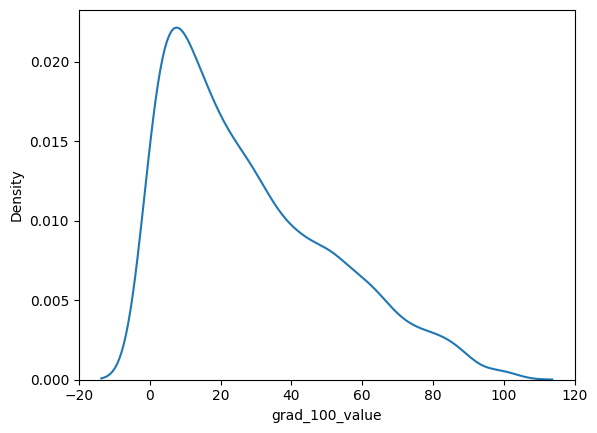

In [ ]:
sns.kdeplot(df['grad_100_value'])
df['grad_100_value'].describe()


<Axes: xlabel='grad_100_value', ylabel='Density'>

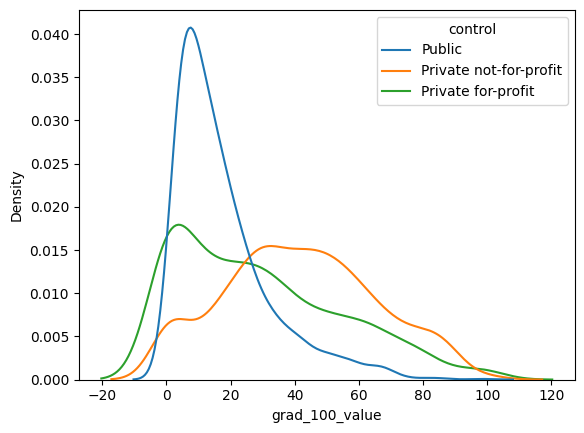

In [ ]:
sns.kdeplot(data =df ,x= 'grad_100_value', hue='control', common_norm=False)

In [ ]:
df.groupby('control')['grad_100_value'].describe()

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


private not-for-proft  colleges have the highest graduation which a mean value of 41.66

<Axes: xlabel='grad_100_value', ylabel='aid_value'>

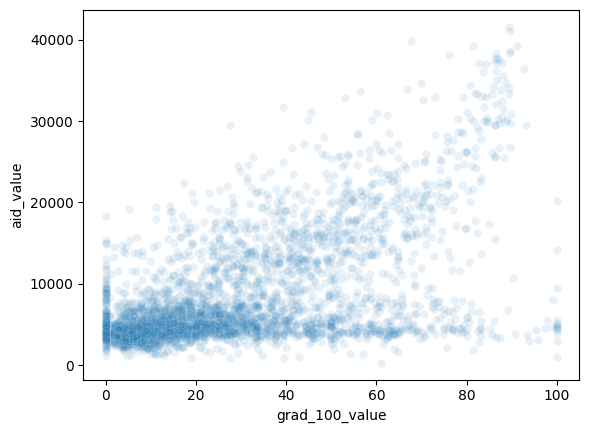

In [ ]:
sns.scatterplot(x=df['grad_100_value'], y = df['aid_value'], alpha=.1)

In [ ]:
df.loc[:,['grad_100_value', 'aid_value']].cov(numeric_only=True)


,grad_100_value,aid_value
grad_100_value,543.483382,8.861048e+04
aid_value,88610.483169,4.121201e+07


In [ ]:
df.loc[:,['grad_100_value', 'aid_value']].corr(numeric_only=True)

,grad_100_value,aid_value
grad_100_value,1.000000,0.575879
aid_value,0.575879,1.000000


<Axes: xlabel='aid_value', ylabel='grad_100_value'>

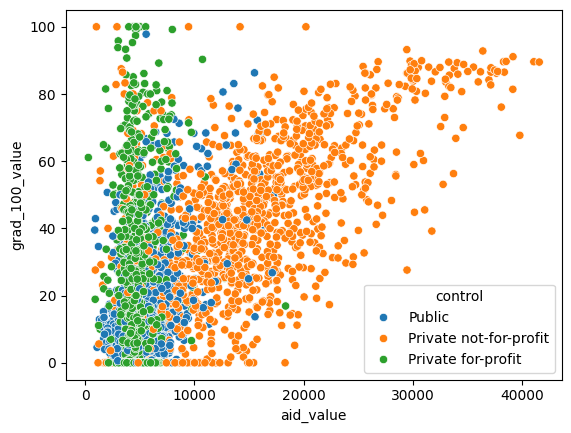

In [5]:
sns.scatterplot(data = df, x='aid_value', y = 'grad_100_value', hue= 'control')

In [ ]:
df.loc[:,['grad_100_value', 'aid_value', 'control']].groupby('control').cov()

grad_100_value     aid_value
control                                                            
Private for-profit     grad_100_value      655.446387  6.897525e+03
                       aid_value          6897.524957  1.957540e+06
Private not-for-profit grad_100_value      554.660462  1.092741e+05
                       aid_value        109274.123337  6.041488e+07
Public                 grad_100_value      216.956489  1.535515e+04
                       aid_value         15355.146212  4.564360e+06

All covariances are positive, which means that as aid increases as graduation rates increases across all categories.  

In [ ]:
df.loc[:,['grad_100_value', 'aid_value', 'control']].groupby('control').cov().describe()

,grad_100_value,aid_value
count,6.000000,6.000000e+00
mean,22158.976307,1.117805e+07
std,43078.656755,2.418654e+07
min,216.956489,6.897525e+03
25%,579.856943,3.883489e+04
50%,3776.485672,1.033407e+06
75%,13240.740898,3.912655e+06
max,109274.123337,6.041488e+07


In [ ]:
df.loc[:,['grad_100_value', 'aid_value', 'control']].groupby('control').corr()

grad_100_value  aid_value
control                                                         
Private for-profit     grad_100_value        1.000000   0.188363
                       aid_value             0.188363   1.000000
Private not-for-profit grad_100_value        1.000000   0.601591
                       aid_value             0.601591   1.000000
Public                 grad_100_value        1.000000   0.482481
                       aid_value             0.482481   1.000000

Private not-for-profit have the highest correlation between the aid anf the graduation rate. Secondly, public category has still a slight positive correlation between the aid and graduation rate. Lastly, the private for profit has the weakest postive correlation.

In [ ]:
df.loc[:,['grad_100_value', 'aid_value', 'control']].groupby('control').corr().describe()

,grad_100_value,aid_value
count,6.000000,6.000000
mean,0.712072,0.712072
std,0.342899,0.342899
min,0.188363,0.188363
25%,0.512259,0.512259
50%,0.800795,0.800795
75%,1.000000,1.000000
max,1.000000,1.000000


I used chatGPT to help me with the math and code

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

I uploaded my answers to this question in the repo as images1-4.

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

,price
count,2930.000000
mean,180796.060068
std,79886.692357
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,755000.000000


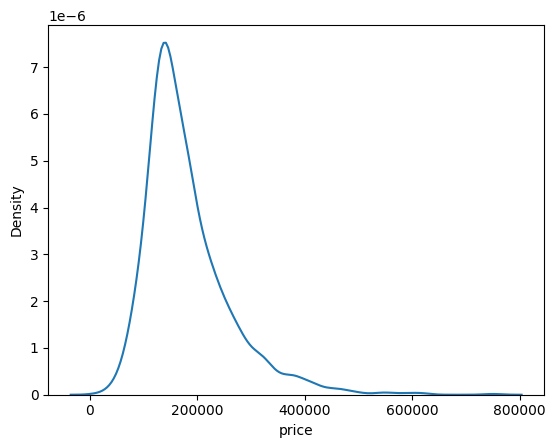

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('/content/data/ames_prices.csv',encoding='latin1')

sns.kdeplot(df['price'])
df['price'].describe()




<Axes: xlabel='price', ylabel='Density'>

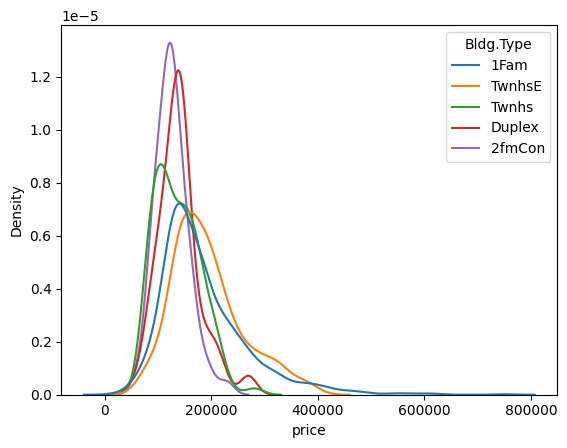

In [ ]:
sns.kdeplot( x=df['price'], hue=df['Bldg.Type'], common_norm=False )

In [ ]:
df.loc[:, ['price', 'Bldg.Type'] ].groupby('Bldg.Type').describe()


price                                                            \
            count           mean           std      min       25%       50%   
Bldg.Type                                                                     
1Fam       2425.0  184812.041237  82821.802329  12789.0  130000.0  165000.0   
2fmCon       62.0  125581.709677  31089.239840  55000.0  106562.5  122250.0   
Duplex      109.0  139808.935780  39498.973534  61500.0  118858.0  136905.0   
Twnhs       101.0  135934.059406  41938.931130  73000.0  100500.0  130000.0   
TwnhsE      233.0  192311.914163  66191.738021  71000.0  145000.0  180000.0   

                               
                75%       max  
Bldg.Type                      
1Fam       220000.0  755000.0  
2fmCon     140000.0  228950.0  
Duplex     153337.0  269500.0  
Twnhs      170000.0  280750.0  
TwnhsE     222000.0  392500.0

one Family building types have the highest average price and also the highest variance in the transaction price

<Axes: xlabel='price', ylabel='Proportion'>

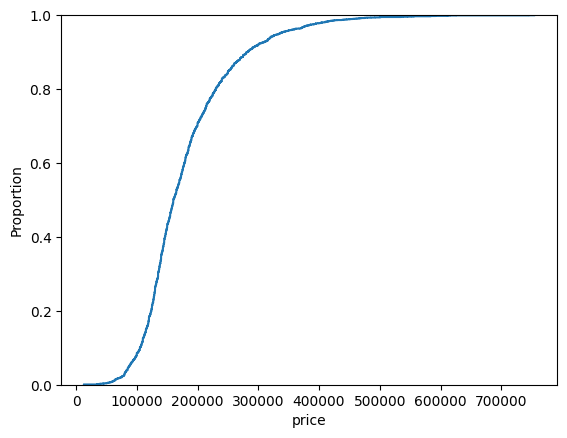

In [ ]:
sns.ecdfplot( df['price'] )

In [ ]:
min = df['price'].min()
q1 = df['price'].quantile(0.25)
med = df['price'].median()
q3 = df['price'].quantile(0.75)
max = df['price'].max()
print("min:",min)
print("25% quantile: ",q1)
print("median: ", med)
print("75% quantile: ",q3)
print("max: ",max)

df['price'].describe()

min: 12789
25% quantile:  129500.0
median:  160000.0
75% quantile:  213500.0
max:  755000


,price
count,2930.000000
mean,180796.060068
std,79886.692357
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,755000.000000


<Axes: xlabel='price'>

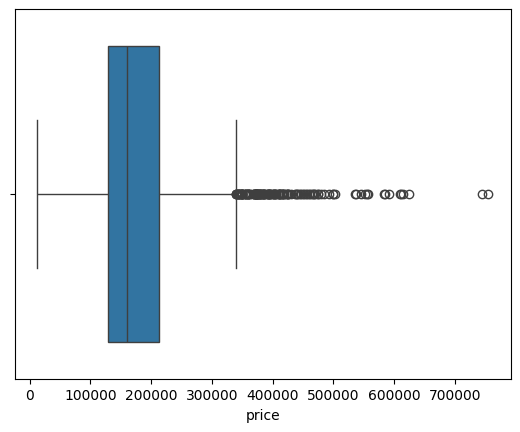

In [ ]:
sns.boxplot(x = df['price'])

There are a lot of outliners points above the upper whisker price.

<Axes: xlabel='price'>

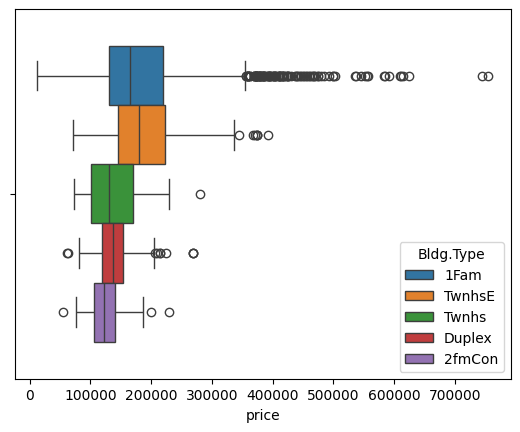

In [ ]:
sns.boxplot(x=df['price'], hue=df['Bldg.Type'])

The 1Fam category has the highest number of outliners and i see that all of the building types overlap with their IQR

In [ ]:
# Compute whiskers:

df['price'] = pd.to_numeric( df['price'], errors = 'coerce' )

q75 = np.nanquantile(df['price'], .75)
print(q75)
q25 = np.nanquantile(df['price'], .25)
print(q25)

iqr = q75 - q25
upper_whisker = q75 + 1.5 * iqr
lower_whisker = q25 - 1.5 * iqr
print(upper_whisker)
print(lower_whisker)

df['var_is_outlier'] = ( (df['price'] < lower_whisker) |
(df['price'] > upper_whisker) ).astype(int)

df['var_winsorize'] = ( (df['price'] < lower_whisker) * lower_whisker
+ (df['price'] > upper_whisker) * upper_whisker
+ (df['price'] >= lower_whisker) * (df['price'] <= upper_whisker) * df['price'])

df['var_winsorize'].describe()

df[['price','var_winsorize','var_is_outlier']].head(10)

213500.0
129500.0
339500.0
3500.0


,price,var_winsorize,var_is_outlier
0,215000,215000.0,0
1,105000,105000.0,0
2,172000,172000.0,0
3,244000,244000.0,0
4,189900,189900.0,0
5,195500,195500.0,0
6,213500,213500.0,0
7,191500,191500.0,0
8,236500,236500.0,0
9,189000,189000.0,0
